# Projeto para seguradora

## Relatorio de analise 1 </n>
#### Entendendo os dados

In [30]:
import pandas as pd

## Relatorio de analise 2</n>
#### Eliminando dados repetidos para visualizar todas as opções de tipos de imoveis

## Relatório de Análise 3 </n>
#### Selecionar tudo que são residencias, tabelar e salvar o arquivo

## Relatório de Análise 4 </n>
#### Seleçao de itens especificos

## Relatório de Análise 5 </n>
#### Retirando ou tratando dados nulos NaN

## Relatório de Análise 6 </n>
#### incluindo e excluindo colunas e linhas

## Relatório de Análise 7 </n>
#### Trabalhando com groupby

### Criando agrupamento

In [31]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

dados

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu,valor m2,tipo agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


In [32]:
dados['valor'].mean()

5046.172821405663

In [33]:
#vou selecionar somente com alguns bairros
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
#bairros selecionados
selecao = dados['bairro'].isin(bairros) 
#na coluna bairro, pelo comando isin, vai desconsiderar os dados que não forem iguais em tabela X bairros
dados = dados[selecao]
# coloca como dados o que estiver na variavel selecao

dados

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu,valor m2,tipo agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21816,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0,37.50,Apartamento
21817,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0,100.00,Apartamento
21818,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0,35.71,Apartamento
21820,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0,33.33,Casa


In [34]:
dados['bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: bairro, dtype: object

In [35]:
#criando grupos
grupo_bairro = dados.groupby('bairro') #fazendo agrupamento da coluna bairro

grupo_bairro.groups #vai mostrar em qual linha foram encontrados os dados da coluna bairro

{'Barra da Tijuca': [5, 14, 16, 21, 30, 32, 35, 42, 43, 60, 61, 64, 68, 74, 79, 93, 107, 110, 112, 117, 130, 132, 136, 150, 153, 155, 165, 166, 173, 186, 189, 207, 214, 221, 224, 233, 236, 239, 244, 259, 265, 274, 276, 291, 292, 293, 295, 302, 308, 311, 325, 335, 336, 345, 360, 366, 368, 374, 380, 387, 389, 400, 412, 432, 433, 435, 436, 439, 449, 451, 462, 463, 465, 473, 476, 484, 494, 500, 503, 511, 537, 538, 539, 540, 543, 547, 552, 554, 555, 556, 584, 587, 588, 590, 594, 596, 601, 611, 622, 630, ...], 'Botafogo': [23, 48, 87, 88, 111, 119, 127, 134, 196, 200, 225, 334, 362, 415, 416, 498, 524, 526, 545, 593, 649, 685, 719, 756, 765, 822, 827, 861, 915, 924, 928, 1006, 1043, 1080, 1091, 1110, 1116, 1127, 1140, 1165, 1201, 1205, 1223, 1250, 1282, 1295, 1304, 1317, 1348, 1383, 1414, 1419, 1455, 1517, 1529, 1579, 1630, 1655, 1670, 1699, 1741, 1742, 1788, 1814, 1823, 1826, 1853, 1922, 1931, 1957, 1972, 1981, 1989, 2029, 2066, 2069, 2081, 2083, 2084, 2088, 2097, 2148, 2149, 2165, 2179, 21

In [36]:
for bairro, dados in grupo_bairro:
    print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [37]:
for bairro, dados in grupo_bairro:
    print(dados)

                     tipo           bairro  quartos  vagas  suites  area  \
5      Casa de Condomínio  Barra da Tijuca        5      4       5   750   
14            Apartamento  Barra da Tijuca        2      1       1    67   
16     Casa de Condomínio  Barra da Tijuca        4      3       2   466   
21            Apartamento  Barra da Tijuca        3      3       1   175   
30            Apartamento  Barra da Tijuca        3      1       2    70   
...                   ...              ...      ...    ...     ...   ...   
21801  Casa de Condomínio  Barra da Tijuca        3      5       3  1000   
21811         Apartamento  Barra da Tijuca        2      1       1    85   
21812         Apartamento  Barra da Tijuca        3      2       0    98   
21813         Apartamento  Barra da Tijuca        3      2       2   140   
21820  Casa de Condomínio  Barra da Tijuca        5      3       4   450   

         valor  condominio    iptu  valor m2 tipo agregado  
5      22000.0         0.0

In [38]:
for bairro, data in grupo_bairro:
    print(f'{bairro} -> {data.valor.mean()}') #mostra a media de valor de cada bairro

Barra da Tijuca -> 7069.552938130986
Botafogo -> 8791.828178694159
Copacabana -> 4126.677004538578
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [39]:
#fazendo o comando acima de maneira mais facil
grupo_bairro['valor'].mean() #Irá mostrar a média de valor de acordo com o grupo_bairro

bairro
Barra da Tijuca    7069.552938
Botafogo           8791.828179
Copacabana         4126.677005
Flamengo           4113.526611
Ipanema            9352.001134
Leblon             8746.344992
Tijuca             2043.520000
Name: valor, dtype: float64

In [40]:
#utilizando mais de uma variavel
#transformando em tabela
#arredondando
grupo_bairro[['valor', 'condominio']].mean().round(2)

,valor,condominio
bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


#### <font color="yellow"> Exercicio - 7 </font>

In [41]:
alunos = pd.DataFrame({'nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['nome', 'idade', 'sexo', 'notas', 'aprovado'])

alunos

,nome,idade,sexo,notas,aprovado
0,Ary,15,M,7.5,True
1,Cátia,27,F,2.5,False
2,Denis,56,M,5.0,False
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True
6,Carlos,19,M,6.0,False
7,Alice,35,F,5.6,False


In [42]:
# Como devemos proceder para obter um DataFrame com as notas médias dos alunos, 
# com duas casas decimais, segundo seu sexo?
grupo_ex = alunos.groupby('sexo')

grupo_ex

In [43]:
grupo_ex = pd.DataFrame(grupo_ex['notas'].mean().round(2))
                                 #em notas, posso deixar sem nada ou selecionar a coluna que quero
grupo_ex

,notas
sexo,
F,5.82
M,7.12


In [44]:
grupo_ex.columns = ['media']

grupo_ex

,media
sexo,
F,5.82
M,7.12


#### <font color="yellow"> fim Exercicio </font>

### Estatistica Descritiva

In [45]:
grupo_bairro['valor'].describe().round(2)

#analisando os dados, olhar os valores e procurar por destorçoes de valores

,count,mean,std,min,25%,50%,75%,max
bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [46]:
grupo_bairro['valor'].aggregate(['min', 'max', 'sum']) #gerando uma tabela com estes valores

,min,max,sum
bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [47]:
grupo_bairro['valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'minimo', 'max': 'maximo'})
#renomeando as colunas

,minimo,maximo,sum
bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [48]:
#começar visualizações com graficos
%matplotlib inline 
#grafico estatico
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15, 10))

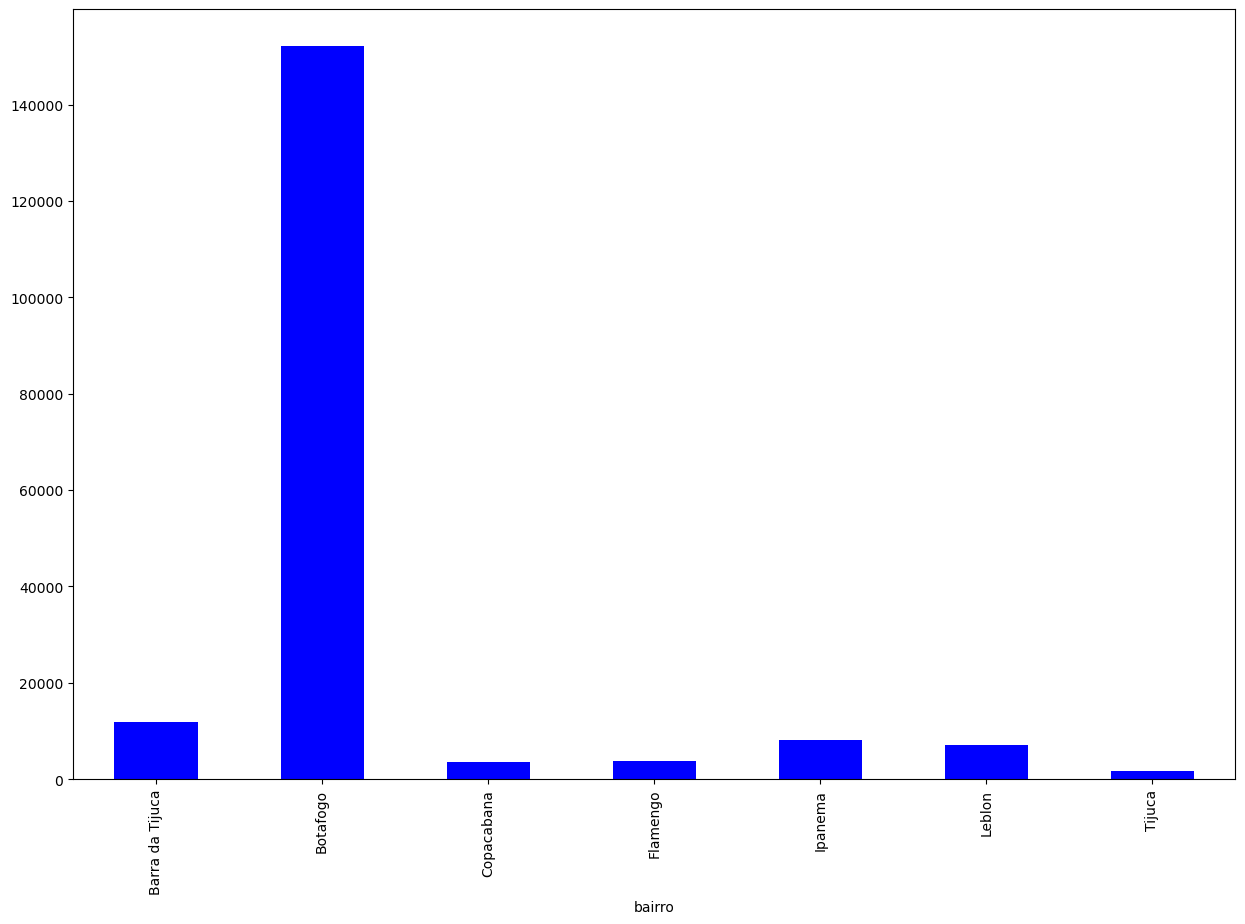

In [49]:
#gerando o grafico
fig = grupo_bairro['valor'].std().plot.bar(color = 'blue')
#atraves dos bairros pela coluna valor, o desvio padrao na cor azul

#perceba os dados muito descorrelacionado, é preciso alterar

Text(0.5, 1.0, 'valor medio por bairro')

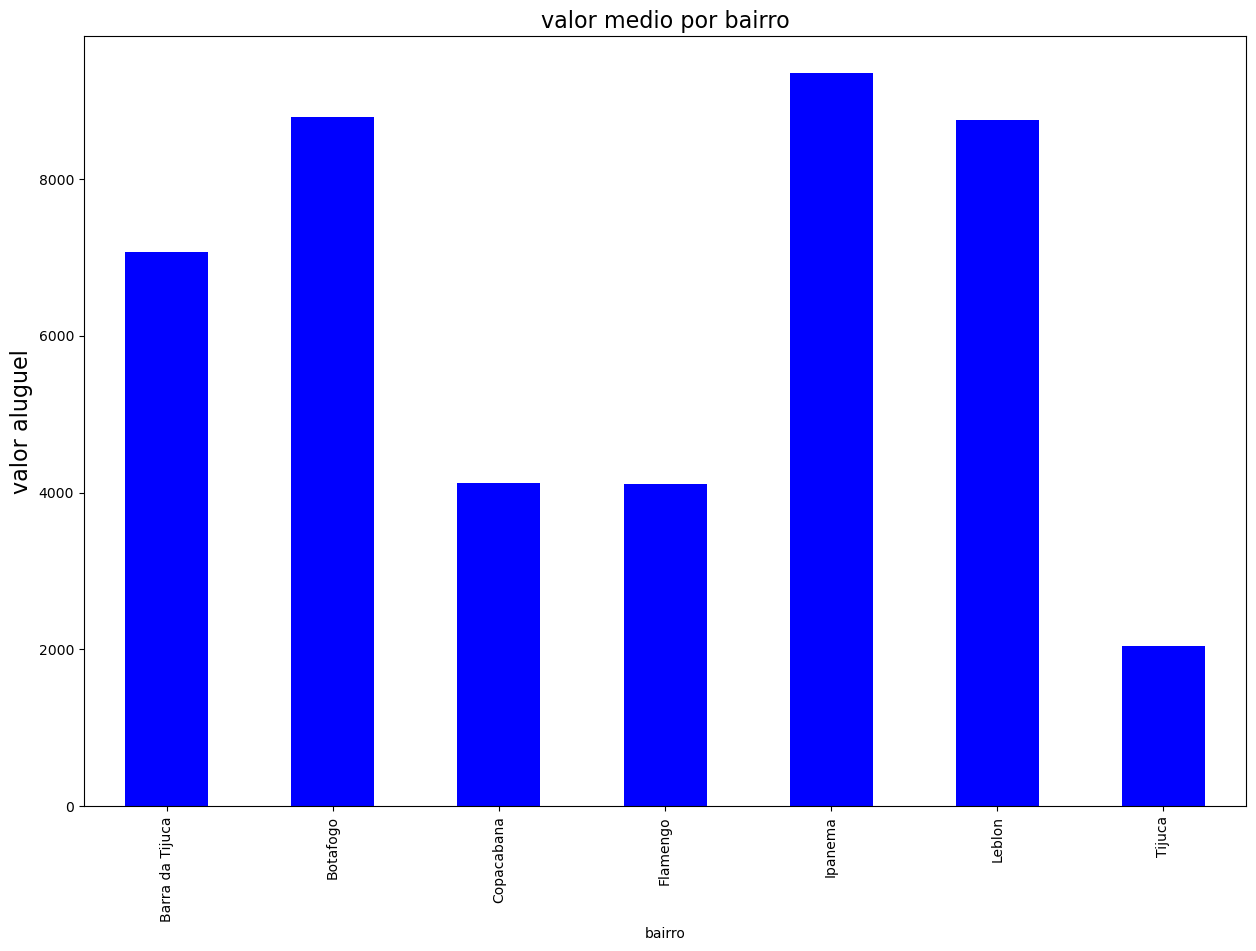

In [50]:
fig = grupo_bairro['valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('valor aluguel', {'fontsize': 16}) #configurando
fig.set_title('valor medio por bairro', {'fontsize': 16}) #configurando

Text(0.5, 1.0, 'valor medio por bairro')

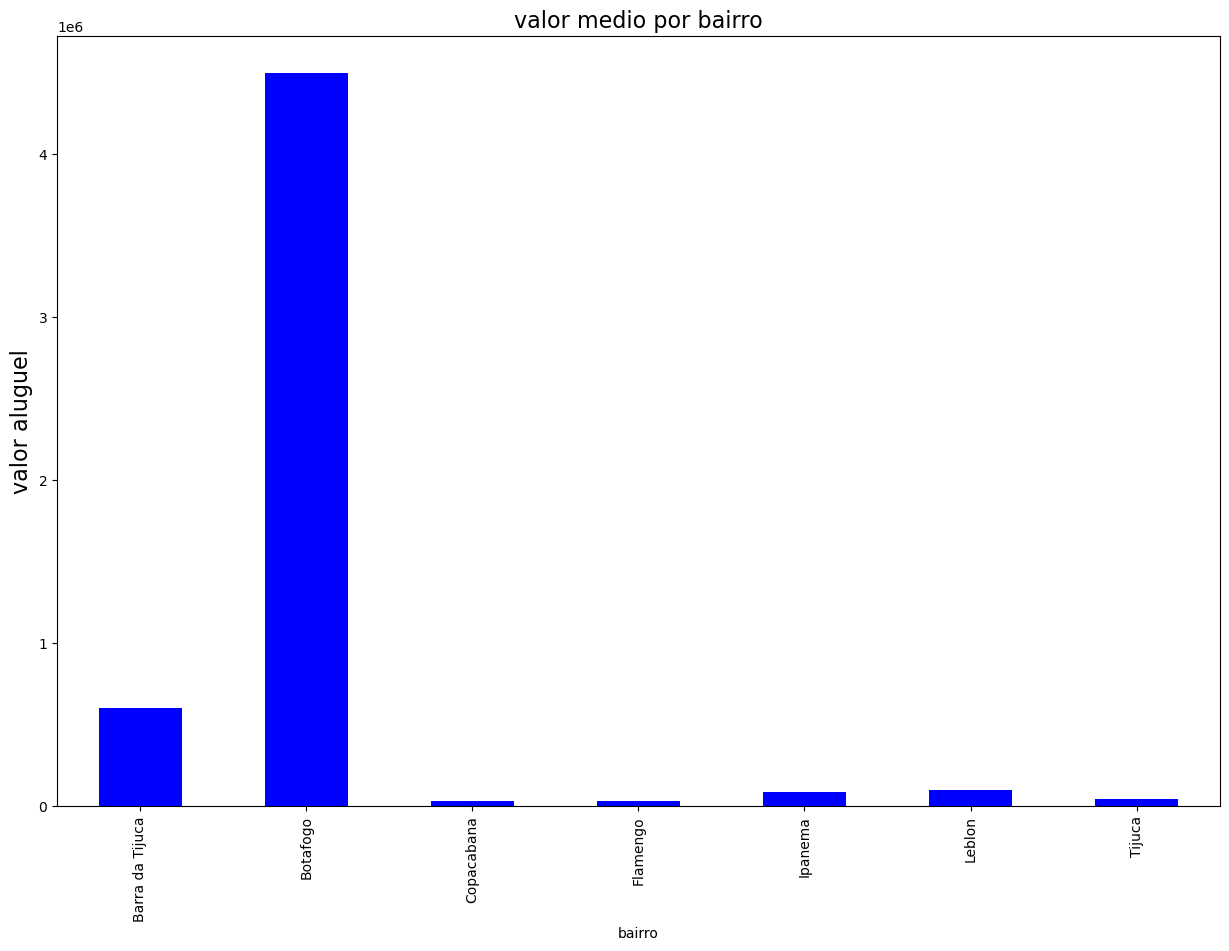

In [51]:
fig = grupo_bairro['valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('valor aluguel', {'fontsize': 16}) #configurando
fig.set_title('valor medio por bairro', {'fontsize': 16}) #configurando

#### <font color="yellow"> Exercicio - 7 </font>

In [52]:
precos = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
precos

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [54]:
produtos = precos.groupby('Produto', sort = False)
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2

In [61]:
estat = ['mean', 'std', 'min', 'max']
dicio = {'mean': 'Média', 'std': 'Desvio', 'min': 'Mínimo', 'max': 'Máximo'}

produtos['Preço'].aggregate(estat).rename(columns = dicio).round(2)
#é possivel usar o aggregate abreviado
# produto['Preço'].agg(['mean', 'std']) 

,Média,Desvio,Mínimo,Máximo
Produto,,,,
Cebola,2.06,0.41,1.69,2.5
Tomate,3.43,0.52,2.99,4.0
Batata,3.96,0.26,3.69,4.2


#### <font color="yellow">fim Exercicio </font>